
### Reuters Dense TF V2

Reuters is a single-label (mutually-exclusive) multiclass classification problem. There are 11,228 data items with 46 different labels. 80% of the data is used for training (8982 items) and 20% for testing (2246).

The data consists of newswires from Reuters, originally generated by parsing and preprocessing the classic Reuters-21578 dataset, but the preprocessing code is not packaged with Keras. Each wire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

#### Reuters TD Dense V2  

The name of the nobtebook is Reuters_ V2 because it  shows how to display model errors during testing

The labels are

{'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20, 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38, 'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4, 'pet-chem': 39, 'grain': 1, 'retail': 29}

or

 ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply', 'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas', 'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin', 'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs', 'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']



In [1]:
#getting the APIs ready
import tensorflow as tf
import keras 
from keras.datasets import reuters
from keras import layers 
import numpy as np

import math 
import matplotlib.pyplot as plt


2025-02-07 19:20:34.276091: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738974034.291269   77634 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738974034.295698   77634 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 19:20:34.310038: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Get the Reuters data.  Keep the four arrays unmodified, because these data will be used in several places of the notebook 
# to do experiments, like adding noise, etc.

(train_data, train_labels), (test_data, test_labels) = reuters.load_data( num_words=10000)

In [3]:
# If this cell is executed, do it line by line, otherwise ignore 
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [5]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
#y_train = np.asarray(train_labels).astype("float32")
#y_test = np.asarray(test_labels).astype("float32")

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [7]:
reuters_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

reuters_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = reuters_model.fit(partial_x_train, partial_y_train, 
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0 )
results = reuters_model.evaluate(x_test, y_test,verbose=0)

I0000 00:00:1738974056.847307   77634 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1147 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:08:00.0, compute capability: 8.6
I0000 00:00:1738974058.263104   77754 service.cc:148] XLA service 0x70b7900088a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738974058.263131   77754 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-02-07 19:20:58.282057: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738974058.333253   77754 cuda_dnn.cc:529] Loaded cuDNN version 90501
2025-02-07 19:20:59.482633: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 292 bytes

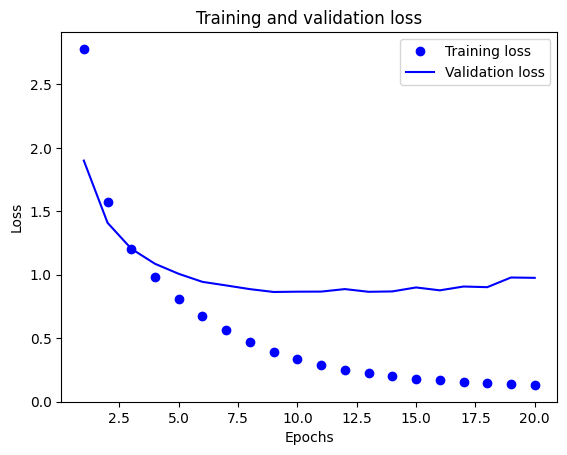

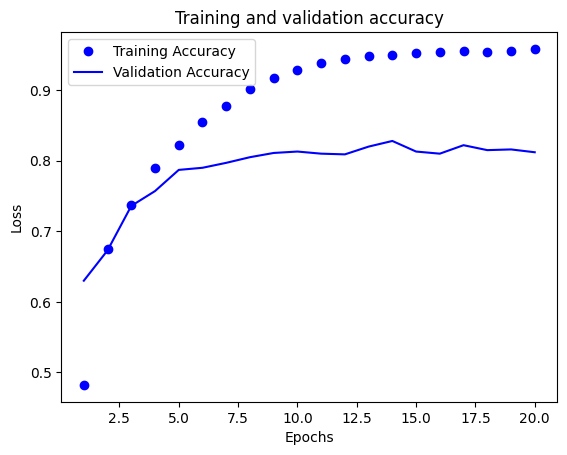

In [8]:
# The metrics I can plot are the 4 keys in the history dict: 
# "loss", "accuracy", "val_loss", "val_accuracy"
# Code in this cell reproduces figs 4.6, 4.7, pps. 109, 110 of Chollet's TF bok, 
# note that model stars overfitting after the 10th epoch 

history_dict = history.history
training_loss_values = history_dict["loss"]
training_acc_values =  history_dict["accuracy"] # this is training accuracy 
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(training_loss_values) + 1)

plt.plot(epochs, training_loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# model validation accuracy does not improve after the 10th epoch, therefore model overfits.
plt.plot(epochs, training_acc_values, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
results = reuters_model.evaluate(x_test, y_test)
predictions = reuters_model.predict(x_test) 

# np.savetxt("reuters_predictions.csv", predictions, delimiter=',')


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 1.0216
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


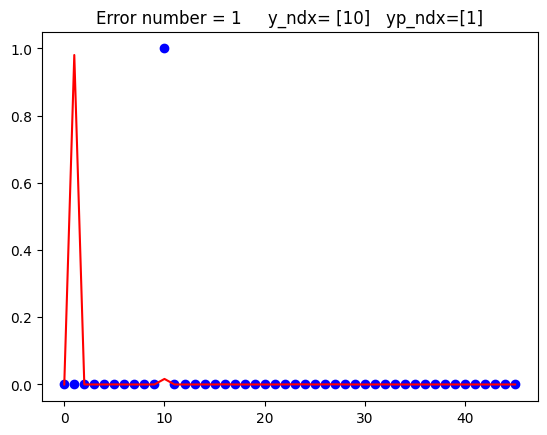

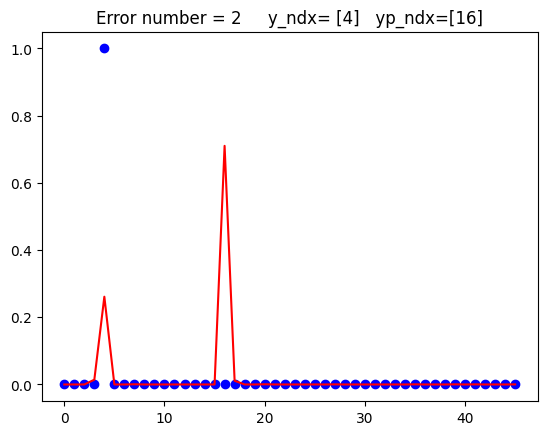

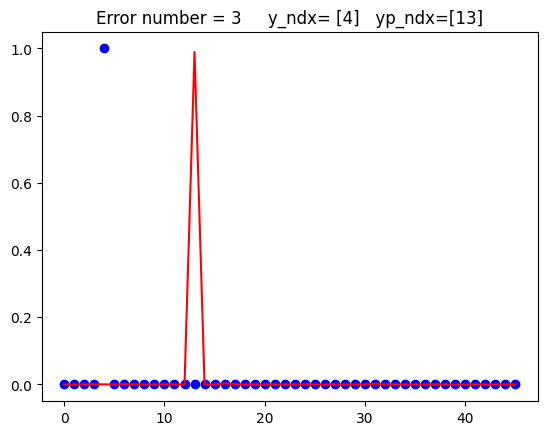

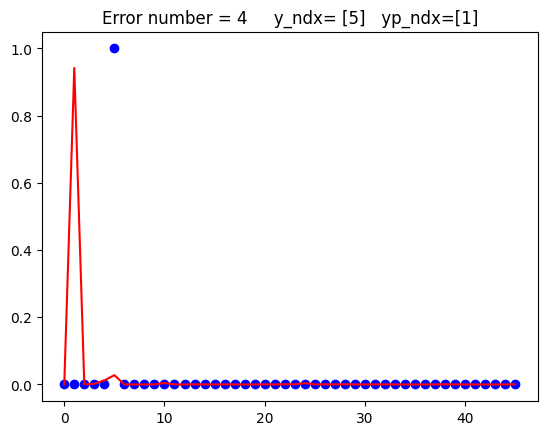

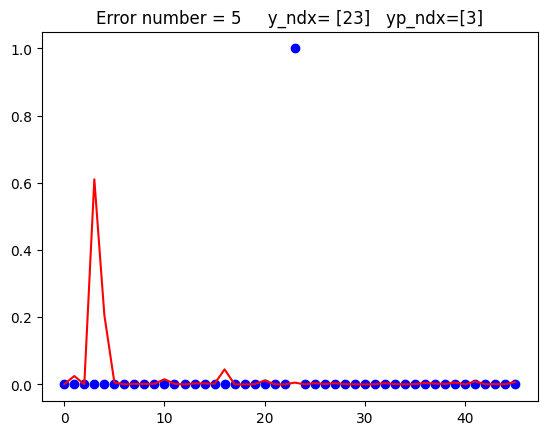

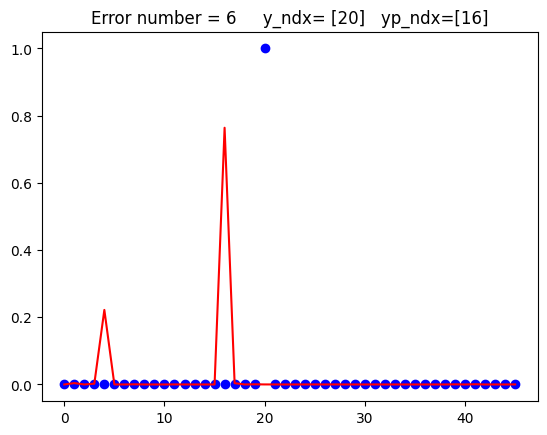

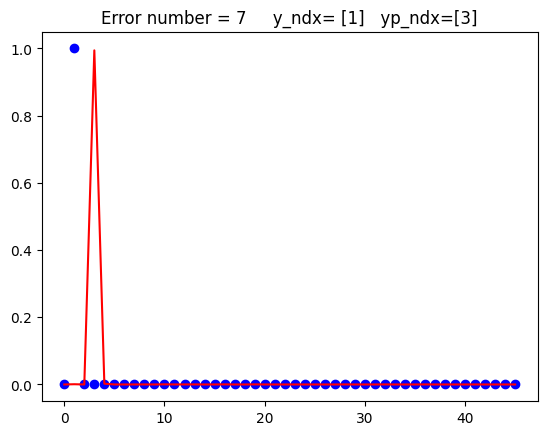

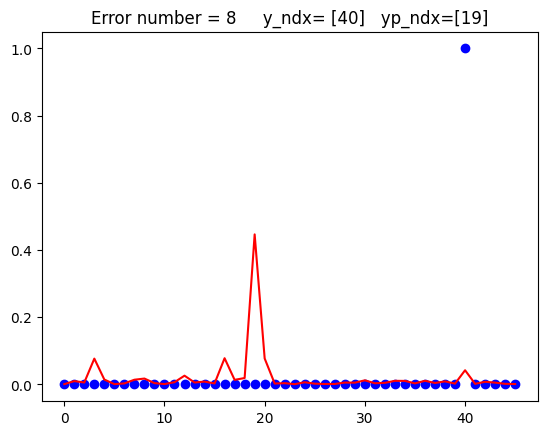

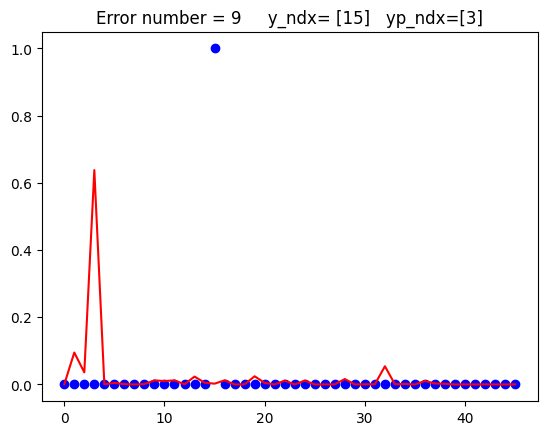

 there are  475   prediction errors


In [10]:
# predictions of first item
x = np.arange(46)
yp = predictions[0,:]
y = y_test[0,:]

# plt.title("Predictions of first item")
# plt.plot(x, y, "bo")
# plt.plot(x, yp, "r")
# plt.show() 
# print(yp)
# print(y)
# print(np.max(y))
# print (np.max(yp))
# y_ndx  = np.where( y  == y.max() )
# yp_ndx = np.where( yp == yp.max() )
# print(y_ndx[0], "      ", yp_ndx[0])

# x is the label number [0..45], 
# y_ndx  is the index of the correct label
# yp_ndx is the index of the predicted label 
nr = y_test.shape[0]
nc = y_test.shape[1]
count_errors = 0
nErr = 10
for i in range(nr):
  yp = predictions[i,:]
  y  = y_test[i,:]
  y_ndx = np.where( y  == y.max() )
  yp_ndx = np.where( yp == yp.max() )
  if (y_ndx != yp_ndx) :
    count_errors += 1
    # display the first nErr errors
    if (count_errors < nErr ) :
      sTitle = "Error number = " + str(count_errors)  + "     y_ndx= " + str(y_ndx[0]) + "   yp_ndx=" + str(yp_ndx[0])
      plt.title( sTitle )
      plt.plot(x, y, "bo")
      plt.plot(x, yp, "r")
      plt.show()
    # print ("i=", i,"  y_ndx=", y_ndx, "   yp_ndx=", yp_ndx )

print(" there are ", count_errors,"  prediction errors") #  there are  468, or 488    prediction errors



In [11]:
reuters_bottleneck_model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),   # this is a bottleneck
    layers.Dense(46, activation="softmax")
])

reuters_bottleneck_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = reuters_bottleneck_model.fit(partial_x_train, partial_y_train, 
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0 )

2025-02-07 19:22:13.275449: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_75', 4 bytes spill stores, 4 bytes spill loads

2025-02-07 19:22:13.567397: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 144 bytes spill stores, 144 bytes spill loads

2025-02-07 19:22:13.866851: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_227', 304 bytes spill stores, 304 bytes spill loads

2025-02-07 19:22:15.454726: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82', 12 bytes spill stores, 12 bytes spill loads

2025-02-07 19:22:17.410568: I external/local_xla/xla/stream_exec

In [12]:
results = reuters_bottleneck_model.evaluate(x_test, y_test)
predictions = reuters_bottleneck_model.predict(x_test) 

# np.savetxt("reuters_predictions.csv", predictions, delimiter=',')

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6979 - loss: 1.3011
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


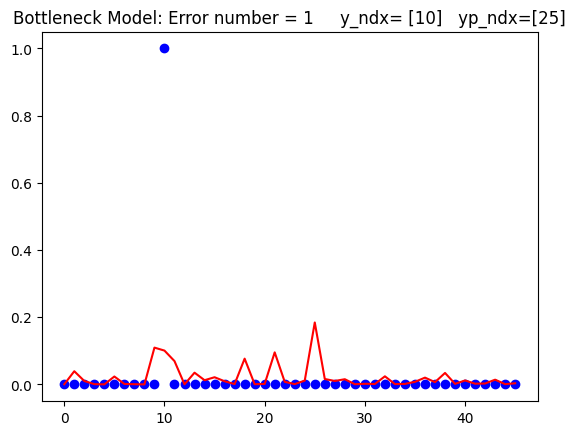

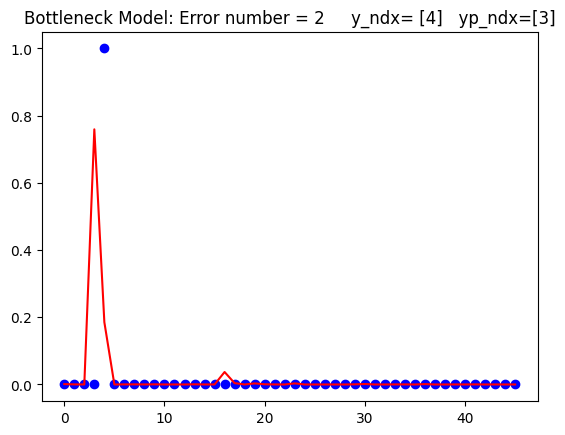

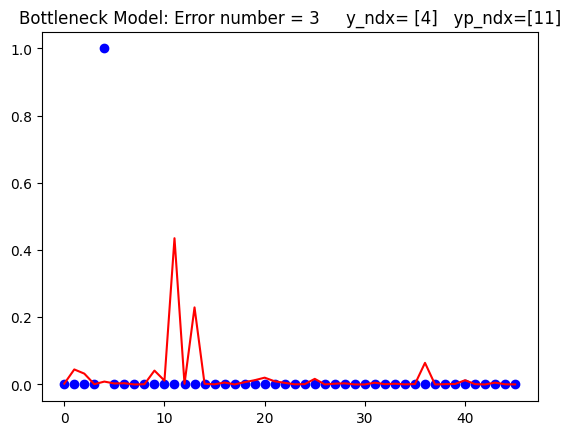

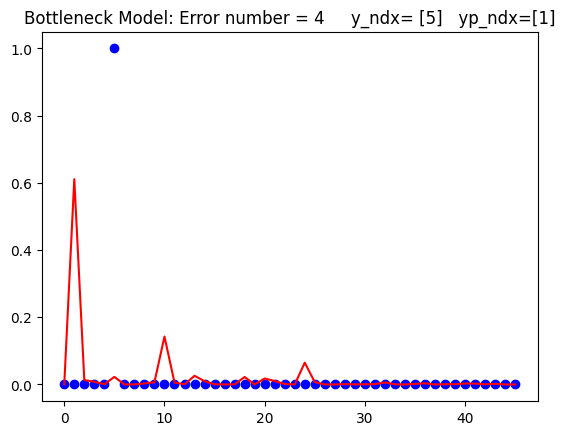

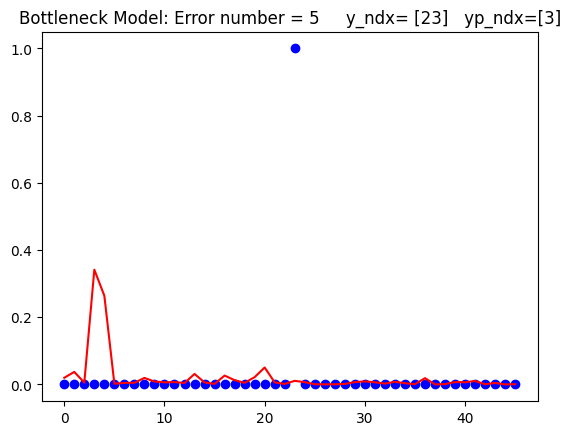

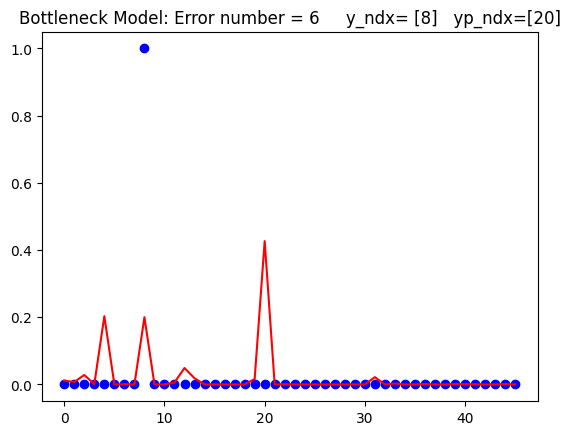

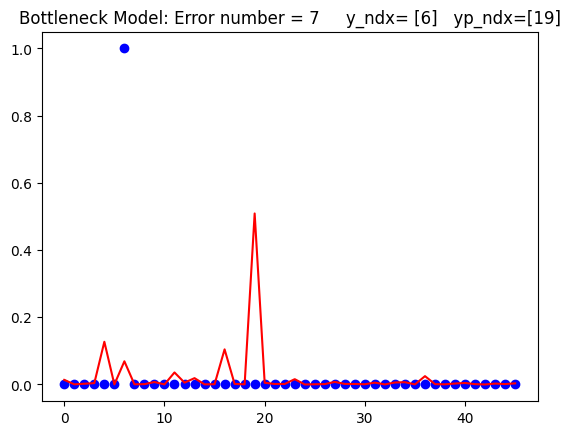

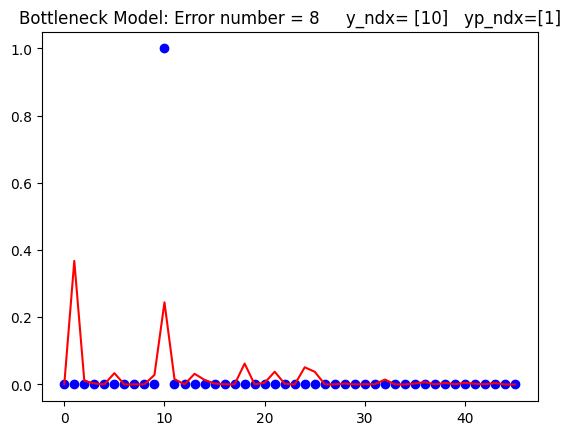

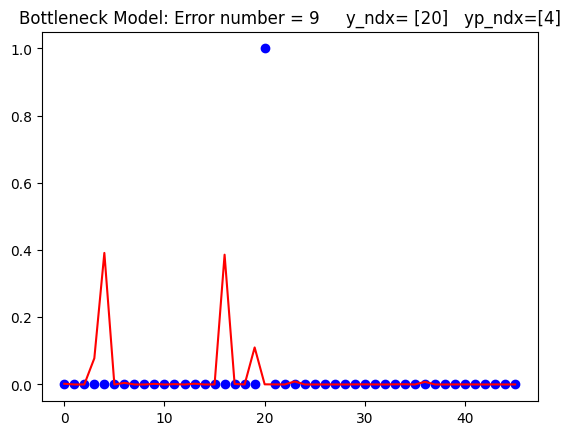

 there are  703   prediction errors


In [14]:
# plot predictions of reuters_bottleneck_model
x = np.arange(46)
yp = predictions[0,:]
y = y_test[0,:]

nr = y_test.shape[0]
nc = y_test.shape[1]
count_errors = 0
nErr = 10
for i in range(nr):
  yp = predictions[i,:]
  y  = y_test[i,:]
  y_ndx = np.where( y  == y.max() )
  yp_ndx = np.where( yp == yp.max() )
  if (y_ndx != yp_ndx) :
    count_errors += 1
    # display the first nErr errors
    if (count_errors < nErr ) :
      sTitle = "Bottleneck Model: Error number = " + str(count_errors)  + "     y_ndx= " + str(y_ndx[0]) + "   yp_ndx=" + str(yp_ndx[0])
      plt.title( sTitle )
      plt.plot(x, y, "bo")
      plt.plot(x, yp, "r")
      plt.show()
    # print ("i=", i,"  y_ndx=", y_ndx, "   yp_ndx=", yp_ndx )

print(" there are ", count_errors,"  prediction errors")

In [15]:
reuters_larger_model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),   # this is a bottleneck
    layers.Dense(46, activation="softmax")
])

reuters_larger_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = reuters_larger_model.fit(partial_x_train, partial_y_train, 
                        epochs=20, batch_size=512,
                        validation_data=(x_val, y_val),
                        verbose=0 )

2025-02-07 19:23:15.441837: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 292 bytes spill stores, 292 bytes spill loads

2025-02-07 19:23:15.924841: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_75_0', 768 bytes spill stores, 720 bytes spill loads

2025-02-07 19:23:15.943934: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_199', 212 bytes spill stores, 212 bytes spill loads

2025-02-07 19:23:16.004859: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_82', 16 bytes spill stores, 16 bytes spill loads

2025-02-07 19:23:16.042069: I external/local_xla/xla/strea

In [16]:
results = reuters_larger_model.evaluate(x_test, y_test)
predictions = reuters_larger_model.predict(x_test) 


2025-02-07 19:23:35.659498: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_54', 16 bytes spill stores, 16 bytes spill loads



71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8048 - loss: 1.0365
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


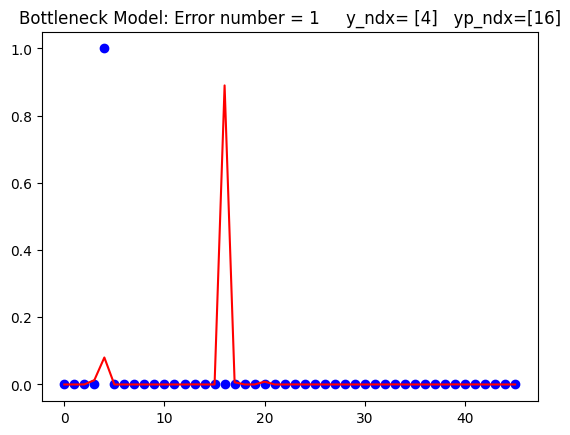

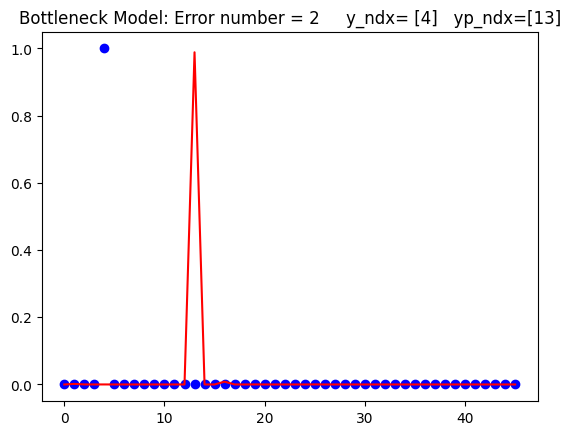

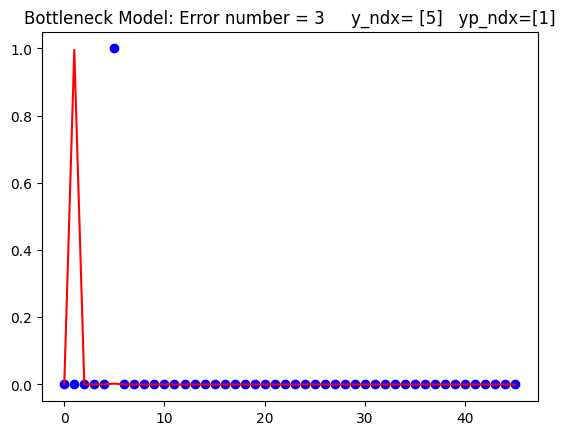

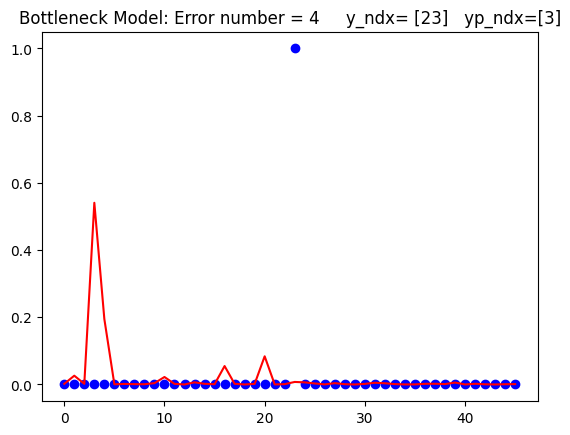

 there are  467   prediction errors


In [17]:
# plot predictions of reuters_larger_model
x = np.arange(46)
yp = predictions[0,:]
y = y_test[0,:]

nr = y_test.shape[0]
nc = y_test.shape[1]
count_errors = 0
nErr = 5
for i in range(nr):
  yp = predictions[i,:]
  y  = y_test[i,:]
  y_ndx = np.where( y  == y.max() )
  yp_ndx = np.where( yp == yp.max() )
  if (y_ndx != yp_ndx) :
    count_errors += 1
    # display the first nErr errors
    if (count_errors < nErr ) :
      sTitle = "Bottleneck Model: Error number = " + str(count_errors)  + "     y_ndx= " + str(y_ndx[0]) + "   yp_ndx=" + str(yp_ndx[0])
      plt.title( sTitle )
      plt.plot(x, y, "bo")
      plt.plot(x, yp, "r")
      plt.show()
    # print ("i=", i,"  y_ndx=", y_ndx, "   yp_ndx=", yp_ndx )

print(" there are ", count_errors,"  prediction errors") #  there are  468, or 488    prediction errors

Code in cells below are for reference only

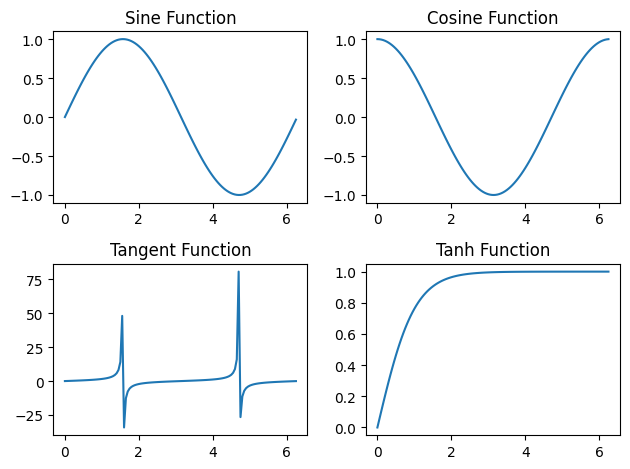

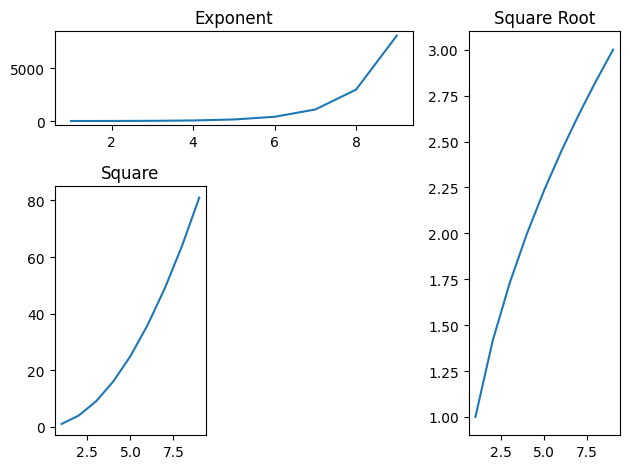

In [18]:
# Plot multiple charts in matplotlib. 
# This code is for reference. It is useful when comparing accuracy, loss, validation at training, validation, testing

# Use plt.subplots() 
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display. 
# tight_layout creates space between the plots for titles, the x- and y- labels
plt.tight_layout() 
plt.show()

# use subplot2grid to place charts is selected areas 
# args: (shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)
# shape:  (r, c)
# loc:    (r,c)  

# Placing the plots in the plane
plot1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
plot2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3, colspan=2)
plot3 = plt.subplot2grid((3, 3), (1, 0), rowspan=2)
  
# Using Numpy to create an array x
x = np.arange(1, 10)

# Plot for exponent
plot1.plot(x, np.exp(x))
plot1.set_title('Exponent')
    
# Plot for square root
plot2.plot(x, x**0.5)
plot2.set_title('Square Root')
  

# Plot for Square
plot3.plot(x, x*x)
plot3.set_title('Square')
  
# Packing all the plots and displaying them
plt.tight_layout()
plt.show()


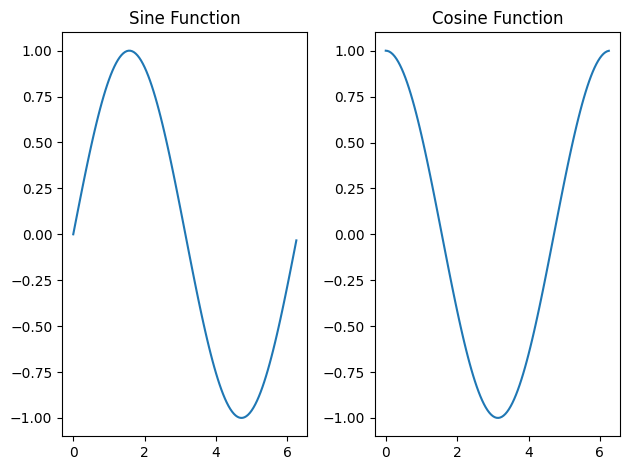

In [19]:
# Use plt.subplots() 
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)

# For Sine Function
axis[0].plot(X, Y1)
axis[0].set_title("Sine Function")
  
# For Cosine Function
axis[1].plot(X, Y2)
axis[1].set_title("Cosine Function")

# Packing all the plots and displaying them
plt.tight_layout()
plt.show()
